In [1]:
import sys
sys.path.append('../src')

from models.ConvNextV2.train_cv import train_cv as train_ConvNextV2Model
from models.ConvNextV2.predict import predict as predict_ConvNextV2Model

from utils.show_graph import plot_history

c:\Users\negi\Documents\GitHub\tkser\technopro-food-package\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
package_model_path, loss_history, auc_history = train_ConvNextV2Model(
    num_epochs=12,
    learning_rate=1e-05,
    batch_size=2,
    n_splits=5
)

[DEBUG] 2023-09-11 20:46:12 - Fold: 1/5
[DEBUG] 2023-09-11 20:46:12 - ----------------------------------------
[DEBUG] 2023-09-11 20:46:18 - Using device: cuda(NVIDIA GeForce RTX 3080)
[DEBUG] 2023-09-11 20:46:18 - Starting training on cuda at 2023-09-11 20:46:18
[DEBUG] 2023-09-11 20:46:18 - Model parameters:
[DEBUG] 2023-09-11 20:46:18 - stem.0.weight: torch.Size([352, 3, 4, 4])
[DEBUG] 2023-09-11 20:46:18 - stem.0.bias: torch.Size([352])
[DEBUG] 2023-09-11 20:46:18 - stem.1.weight: torch.Size([352])
[DEBUG] 2023-09-11 20:46:18 - stem.1.bias: torch.Size([352])
[DEBUG] 2023-09-11 20:46:18 - stages.0.blocks.0.conv_dw.weight: torch.Size([352, 1, 7, 7])
[DEBUG] 2023-09-11 20:46:18 - stages.0.blocks.0.conv_dw.bias: torch.Size([352])
[DEBUG] 2023-09-11 20:46:18 - stages.0.blocks.0.norm.weight: torch.Size([352])
[DEBUG] 2023-09-11 20:46:18 - stages.0.blocks.0.norm.bias: torch.Size([352])
[DEBUG] 2023-09-11 20:46:18 - stages.0.blocks.0.mlp.fc1.weight: torch.Size([1408, 352])
[DEBUG] 2023-09-

In [3]:
package_model_path

['c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\ConvNextV2\\../../data/models/ConvNextV2_cv\\convnext_20230911204618_epoch_12_auc_0.8450.pth',
 'c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\ConvNextV2\\../../data/models/ConvNextV2_cv\\convnext_20230911205754_epoch_12_auc_0.8871.pth',
 'c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\ConvNextV2\\../../data/models/ConvNextV2_cv\\convnext_20230911210922_epoch_12_auc_0.8461.pth',
 'c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\ConvNextV2\\../../data/models/ConvNextV2_cv\\convnext_20230911212041_epoch_12_auc_0.8558.pth',
 'c:\\Users\\negi\\Documents\\GitHub\\tkser\\technopro-food-package\\notebook\\../src\\models\\ConvNextV2\\../../data/models/ConvNextV2_cv\\convnext_20230911213155_epoch_12_auc_0.8677.pth']

In [4]:
best_auc_model_paths = package_model_path

import pandas as pd
sample_submission = pd.read_csv("../src/data/input/sample_submit.csv", header=None, names=['image_name', 'label'])
sample_submission.drop('label', axis=1, inplace=True)

for fold, best_auc_model_path in enumerate(best_auc_model_paths):
  _, y_pred = predict_ConvNextV2Model(
      model_path=best_auc_model_path,
      batch_size=2,
      seed=42
  )
  sample_submission[f'fold_{fold}'] = y_pred

sample_submission['label'] = sample_submission.iloc[:, 1:].mean(axis=1)
sample_submission.drop(sample_submission.columns[1:-1], axis=1, inplace=True)

sample_submission.to_csv('../src/data/output/submit_convnextv2_202309112146_5fold_auc_0.86034.csv', index=False, header=False)

[DEBUG] 2023-09-11 21:47:14 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [00:53<00:00, 20.21it/s]
[DEBUG] 2023-09-11 21:48:08 - Finished prediction
[DEBUG] 2023-09-11 21:48:16 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [00:53<00:00, 20.47it/s]
[DEBUG] 2023-09-11 21:49:09 - Finished prediction
[DEBUG] 2023-09-11 21:49:16 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [00:53<00:00, 20.51it/s]
[DEBUG] 2023-09-11 21:50:09 - Finished prediction
[DEBUG] 2023-09-11 21:50:17 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [00:52<00:00, 20.60it/s]
[DEBUG] 2023-09-11 21:51:10 - Finished prediction
[DEBUG] 2023-09-11 21:51:16 - Starting prediction on cuda
Prediction: 100%|██████████| 1090/1090 [00:52<00:00, 20.63it/s]
[DEBUG] 2023-09-11 21:52:09 - Finished prediction


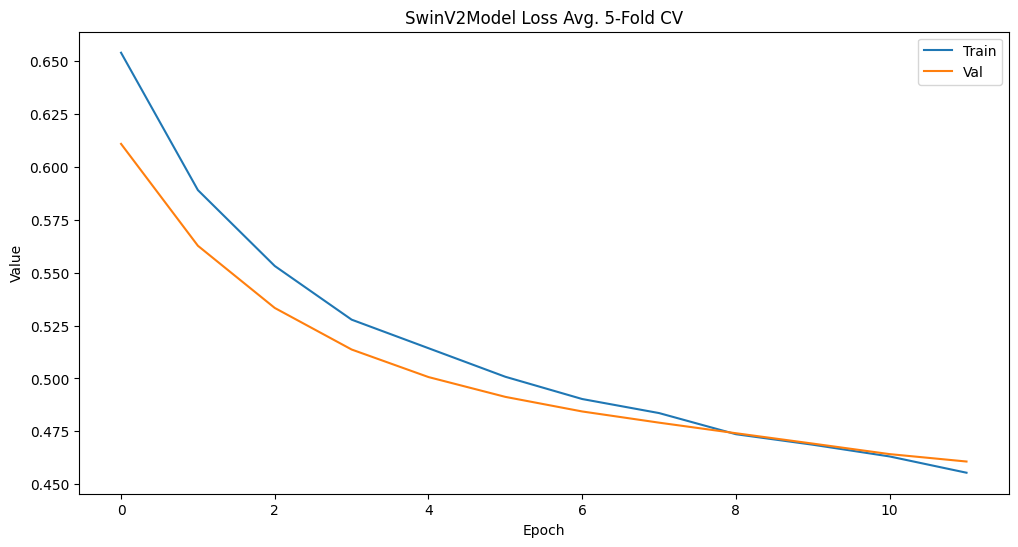

In [5]:
plot_history(loss_history, "SwinV2Model Loss Avg. 5-Fold CV")

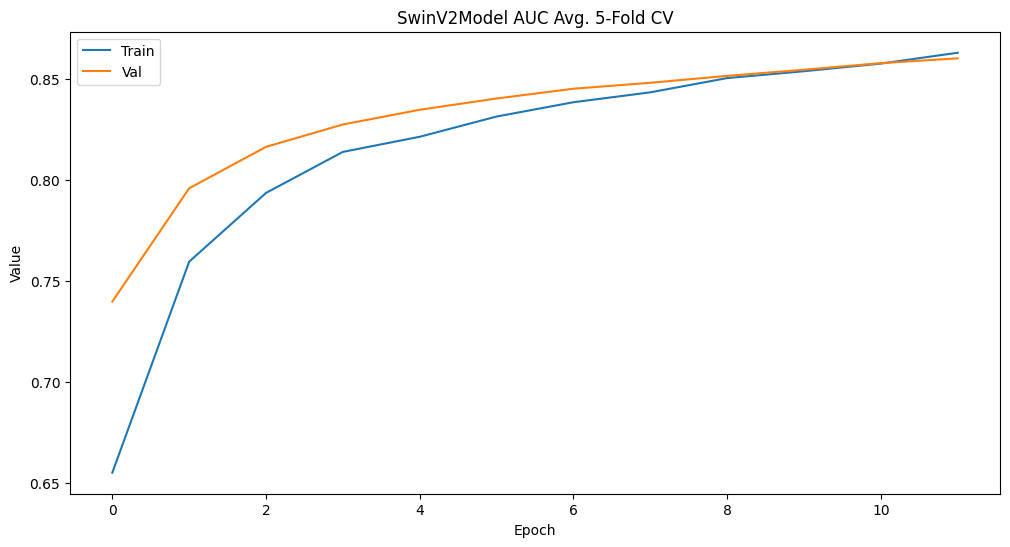

In [6]:
plot_history(auc_history, "SwinV2Model AUC Avg. 5-Fold CV")